In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/matrix-numa.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
0,103220,1.200,1307114,614401,231859,4110,116673,10145,649284,600000,...,2.624444,8.035513,0.551647,3.048469,0.086952,0.201429,0.181769,0.222155,0.173076,NaN
1,205568,1.200,610882,385223,149258,2543,85186,4675,301181,600000,...,6.243881,42.393750,8.770138,14.597683,0.054880,0.233339,0.128205,0.227239,0.160916,4.851712
2,307856,1.244,526307,351896,135619,1946,80168,3802,258956,600000,...,8.890882,38.465816,3.845929,13.047069,0.047425,0.201641,0.127479,0.267298,0.160961,4.775985
3,410140,1.200,622139,398659,154841,2602,85109,5123,306854,600000,...,8.106584,20.460124,11.512746,10.265663,0.060193,0.228060,0.255392,0.279333,0.205744,4.915148
4,512451,1.200,533912,350628,134734,1928,80001,3818,262809,600000,...,1.002509,38.236446,9.553240,12.444471,0.047724,0.245404,0.126062,0.227734,0.161731,7.026693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,44128860,1.256,655073,414426,158978,1748,88596,4937,323293,1000000,...,45.817815,45.093050,8.850139,25.187502,0.055725,0.123907,0.126062,0.180287,0.121495,4.714303
432,44230433,1.256,527923,342098,131198,1919,78562,3714,259774,1000000,...,37.908092,37.222758,5.029008,20.286308,0.047275,0.126471,0.128895,0.180952,0.120898,4.195849
433,44332038,1.248,1204801,657272,256566,4295,104667,9046,598148,1000000,...,74.078256,72.798241,18.337292,41.549262,0.086426,0.126100,0.128895,0.193343,0.133691,7.021554
434,44433621,1.256,517999,338287,129608,1867,78492,3639,254738,1000000,...,37.287770,9.810378,9.355356,14.359775,0.046361,0.124816,0.286421,0.183193,0.160198,4.095990


In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.016056
insns_0              -0.049032
cache_hit_0          -0.056022
cache_miss_0         -0.045667
br_insns_0           -0.053535
br_miss_0            -0.041555
bus_cycles_0          0.015893
freq_0                0.615287
cpu_cycles_1          0.971039
insns_1               0.971842
cache_hit_1           0.974235
cache_miss_1          0.962184
br_insns_1            0.966598
br_miss_1             0.917388
bus_cycles_1          0.971038
freq_1                0.615287
cpu_cycles_2          0.011584
insns_2              -0.003699
cache_hit_2          -0.000614
cache_miss_2          0.000028
br_insns_2           -0.006561
br_miss_2            -0.002601
bus_cycles_2          0.011549
freq_2                0.615287
cpu_cycles_3          0.106832
insns_3               0.099469
cache_hit_3           0.096632
cache_miss_3          0.097261
br_insns_3            0.101940
br_miss_3             0.099783
bus_cycles_3          0.106805
freq_3  

<Axes: xlabel='time'>

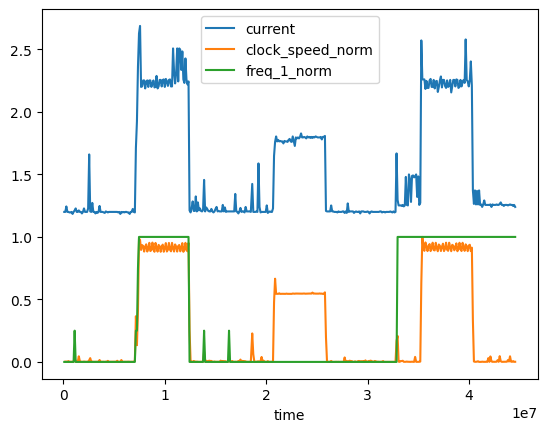

In [5]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [6]:
mem_df = pd.read_csv('../results/mem-numa.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
0,103092,1.192,842242,496307,191947,2600,101231,6488,416873,600000,...,3.393801,8.680727,2.231260,3.823061,0.064091,0.173928,0.163836,0.246824,0.162170,NaN
1,205393,1.200,580872,375486,146089,2146,83058,4164,286145,600000,...,41.432908,41.446935,1.220947,21.271525,0.050134,0.135021,0.134561,0.255589,0.143826,6.666416
2,307686,1.252,506424,342104,131755,1863,78656,3404,249020,600000,...,37.926576,37.380250,2.262329,19.638754,0.043277,0.124457,0.131728,0.248202,0.136916,4.908352
3,410002,1.196,581977,374679,144320,2415,82320,4669,286713,600000,...,17.244944,40.945800,5.778712,16.238181,0.056718,0.268827,0.131728,0.219072,0.169086,4.592214
4,512236,1.200,604266,386294,150581,2315,84081,4660,297951,600000,...,42.743896,42.770739,6.578795,23.269514,0.055423,0.128205,0.128205,0.225564,0.134349,4.533179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16176106,1.204,564624,371632,143920,2134,81864,4506,278128,600000,...,41.368603,40.832293,40.808565,30.998658,0.055043,0.127168,0.133144,0.131728,0.111771,3.938032
136,16278370,1.200,542725,362460,140225,1969,80699,4303,267179,600000,...,40.353195,40.298362,18.767015,25.101133,0.053322,0.124269,0.127941,0.174356,0.119972,3.930249
137,16380633,1.200,585103,382324,148131,2259,82482,4967,288306,600000,...,42.665802,42.015319,42.026390,31.923065,0.060219,0.123010,0.127298,0.130312,0.110210,4.042635
138,16482892,1.200,543770,360861,139920,2006,80178,4104,267664,600000,...,40.346986,39.685674,8.511252,22.382394,0.051186,0.124457,0.128895,0.195004,0.124886,4.121799


In [7]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.315527
insns_0               0.182146
cache_hit_0           0.180997
cache_miss_0          0.213224
br_insns_0            0.184669
br_miss_0             0.212592
bus_cycles_0          0.315394
freq_0                0.961391
cpu_cycles_1          0.944548
insns_1               0.879401
cache_hit_1           0.921243
cache_miss_1          0.752279
br_insns_1            0.845693
br_miss_1             0.796283
bus_cycles_1          0.944548
freq_1                0.961391
cpu_cycles_2          0.508673
insns_2               0.499250
cache_hit_2           0.498151
cache_miss_2          0.496954
br_insns_2            0.499164
br_miss_2             0.493954
bus_cycles_2          0.508631
freq_2                0.961391
cpu_cycles_3          0.513773
insns_3               0.478268
cache_hit_3           0.475525
cache_miss_3          0.514357
br_insns_3            0.488182
br_miss_3             0.565056
bus_cycles_3          0.513775
freq_3  

<Axes: xlabel='time'>

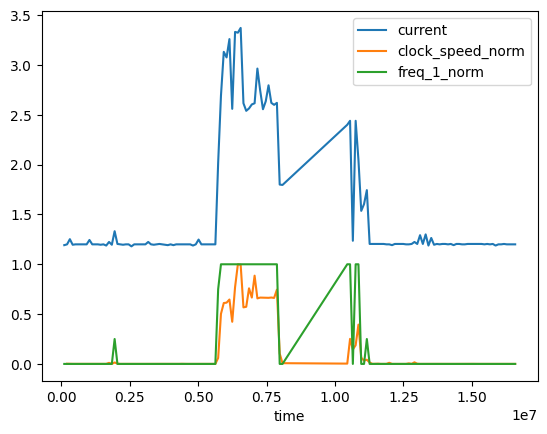

In [9]:
mem_df['clock_speed_norm'] = min_max_scaling(mem_df['clock_speed'])
mem_df['freq_1_norm'] = min_max_scaling(mem_df['freq_1'])

mem_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])